In [1]:
from bs4 import BeautifulSoup as bs
import requests
from splinter import Browser
import pandas as pd

In [2]:
!pip install splinter

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!which chromedriver

/usr/local/bin/chromedriver


In [4]:
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [5]:
html = browser.html
soup_splinter = bs(html, 'html.parser')

In [6]:
name_list = [" Wicks", " Bonta"]
name_list1 = ','.join(name_list)
df = pd.DataFrame(columns=['Bill', 'Sponsor', "Ayes", "Nays", "Abstentions", "Venue"])


In [7]:
#This function scrapes the CA Legislative website and puts data about legislations number,
#sponsors and votes
def bill_scraper(pages):

#Generating url
    for i in range(1,int(pages)):
        votes = []
        url = f"https://leginfo.legislature.ca.gov/faces/billVotesClient.xhtml?bill_id=201920200AB" + str(i)
        bill = f"AB{i}"
#Scraping url
        requested = requests.get(url)
        soup = bs(requested.text, 'html.parser')
        spans = soup.find_all('span')
#Getting and scraping status url for bill sponsors
        status_url = f"https://leginfo.legislature.ca.gov/faces/billStatusClient.xhtml?bill_id=201920200AB" + str(i)
        status_requested = requests.get(status_url)
        status_soup = bs(status_requested.text, 'html.parser')
        sponsor = status_soup.find_all('span', id="leadAuthors")[0].text
#Grabbing and cleaning ayes, noes and abstentions
        if len(spans) > 37:
            ayes = str(spans[38])
            noes = str(spans[40])
            abstentions = str(spans[42])
            ayes_clean = ayes[7:-7]
            noes_clean = noes[7:-7]
            abstentions_clean = abstentions[7:-7]
#turning each category into a list
            all_ayes = ayes_clean.split(",")
            all_noes = noes_clean.split(",")
            all_abstentions = abstentions_clean.split(",")
            if len(all_ayes) + len(all_noes) + len(all_abstentions) < 70:
                venue = "Committee"
            else: 
                venue = "Floor" 
            df.loc[i] = [bill] + [sponsor] + [len(all_ayes)] + [len(all_noes)] + [len(all_abstentions)] + [venue]
"""
            #putting the bill into a dataframe
            for name in name_list:
                if name in all_ayes:
                    votes.append("0")
                elif name in all_noes:
                    votes.append("1")
                elif name in all_abstentions:
                    votes.append("3")
                else: votes.append("4")
            df.loc[i] = [bill] + [sponsor] + votes
"""           

'\n            #putting the bill into a dataframe\n            for name in name_list:\n                if name in all_ayes:\n                    votes.append("0")\n                elif name in all_noes:\n                    votes.append("1")\n                elif name in all_abstentions:\n                    votes.append("3")\n                else: votes.append("4")\n            df.loc[i] = [bill] + [sponsor] + votes\n'

In [10]:
#Gathering lots of data
bill_scraper(2000)

In [11]:
df.head()

,Bill,Sponsor,Ayes,Nays,Abstentions,Venue
1,AB1,Cooper (A),68,1,12,Floor
2,AB2,"Santiago (A) , Bonta (A) , Cervantes (A) , Chi...",72,1,8,Floor
3,AB3,Cooper (A),19,1,1,Committee
4,AB4,"Arambula (A) , Bonta (A) , Chiu (A) , Gonzalez...",51,17,12,Floor
5,AB5,Gonzalez (A),59,15,6,Floor


In [12]:
#With our scraper getting vote data, now we're going to incorporate 
#data about the legislators and their district

In [8]:
ca_asm_data = pd.read_excel("Ca-Asm-Basic-Info.xlsx")

In [9]:
ca_asm_data_df = pd.DataFrame(ca_asm_data)

In [10]:
ca_asm_data_df["Name"] = ca_asm_data_df["Name"].str.split()

In [12]:
#Creating a column for legislator last names
ca_asm_data_df["Last Name"] = "hi"
for i in range(0, len(ca_asm_data_df["Name"])):
    ca_asm_data_df["Last Name"][i] = ca_asm_data_df["Name"][i][-1]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
#Creating a column for sponsor last names in the bills dataframe
df["Sponsor Last Names"] = df["Sponsor"].str.split(",")

In [14]:
#Creating columns for number of Democrat and Republican sponsors
df["Dem Sponsors"] = 0
df["Rep Sponsors"] = 0

In [15]:
#Look at svm -- for separating the data into sections. Use for logistic.
#Naive base algorithms bayes that is. This is for given an x input, what is the probability that y is true or false.

#Looks at given a set of inputs, what's the probability of the output.
#Have a validation set, test set, training set, in the end you do your test set.
#For neural networks, this is too little quantity, so keras and tensorflow shouldn't be first choice.
#Try to understand how each algorithm works.
#Linear is for quantity of yes and no votes
#Logistic
#Hyper barometer tuning. Every ML algorithm has a set of parameters you can set to something.
#You can play with the nobs to see what gives the best accuracy.
#Look into sklearn grid search
#Use all of those and train your data on it.
#Don't get hung up on high accuracy. The first step is to understand what can be done. 

In [16]:
#ML process
#Build by plank. sklearn needs help to understand pandas. Put one-hot encoding in the pipeline.
#Divide up data into : training, validation and test
#2. Have a pipeline with whatever processing you need to do on the columns
#3. Pick various algorithms to see what kind of algorithms
#4. Look into sklearn grid search. Try out various things to see which parameter tunes work
#5. Then take your test data and do a prediction.

#All you have to do is switch out the model. The interface is mostly the same. One diff is the parameters.
#First you do the data preprocessing -- same for all algorithms. Only diff is between logistic and linear regression.

#From there use pikl.

In [17]:
df2 = pd.DataFrame(pd.read_csv("CA-bills-floor-votes.csv"))

In [18]:
df2.head()

,Unnamed: 0,Bill,Sponsor,Ayes,Nays,Abstentions,Venue,Sponsor Last Names,Dem Sponsors,Rep Sponsors
0,1,AB1,Cooper (A),68,1,12,Floor,['Cooper (A) '],1,0
1,2,AB2,"Santiago (A) , Bonta (A) , Cervantes (A) , Chi...",72,1,8,Floor,"['Santiago (A) ', ' Bonta (A) ', ' Cervantes (...",8,0
2,4,AB4,"Arambula (A) , Bonta (A) , Chiu (A) , Gonzalez...",51,17,12,Floor,"['Arambula (A) ', ' Bonta (A) ', ' Chiu (A) ',...",5,0
3,5,AB5,Gonzalez (A),59,15,6,Floor,['Gonzalez (A) '],1,0
4,6,AB6,"Reyes (A) , McCarty (A)",72,1,8,Floor,"['Reyes (A) ', ' McCarty (A) ']",2,0


In [19]:
#Creating a column for sponsor last names in the bills dataframe
df2["Sponsor Last Names"] = df2["Sponsor"].str.split(",")

In [20]:
#This for loop looks at the sponsor column from the main df and the party column from the 
#member info df and adds number of sponsors by party to the appropriate column
for i in range (1, len(df2["Sponsor Last Names"])):
    try:
        for j in range(0, (len(df2["Sponsor Last Names"][i]))):
            sponsor_names = df2["Sponsor Last Names"][i][j][0:-5]
            if sponsor_names[0] == " ":
                sponsor_names = sponsor_names[1:]
            if " " in sponsor_names:
                print("this")
                sponsor_names = sponsor_names.split(" ")
                sponsor_names = sponsor_names[-1]
            sponsor_index = ca_asm_data_df.index[ca_asm_data_df["Last Name"] == sponsor_names].tolist()[0]
            sponsor_party = ca_asm_data_df.iloc[sponsor_index, 2]
            if sponsor_party == "Democratic":
                df2["Dem Sponsors"][i] = df2["Dem Sponsors"][i] + 1
                print(df2["Dem Sponsors"][i])
            elif sponsor_party == "Republican":
                df2["Rep Sponsors"][i] = df2["Rep Sponsors"][i] + 1
            else: 
                print("no party")
    except:
        print("no bill")


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


9
10
11
12
13
14
15
16
6
7
8
9
10
2
3
4
3
4
2
this
3
3


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4
6
7
8
9
10
3
4
4
5
6
this
1
2
2
2
2
5
6
7
8
no bill
2
this
3
2
2
3
4
2
2
this
1
2
2
2
7
8
9
10
11
12
2
2
this
1
this
1
2
4
5
6
2
this
1
2
2
2
2
2
2
2
2
2
2
2
2
2
this
no bill
2
2
2
2
2
2
2
2
this
no bill
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
9
10
11
12
13
14
15
16
this
17
18
19
20
this
21
this
22
23
24
25
26
9
10
11
12
13
14
15
16
this
17
18
19
20
this
21
this
22
23
24
25
2
2
3
4
2
2
4
5
6
2
2
2
this
1
2
2
2
this
1
this
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
this
1
2
no bill
2
2
3
4
2
2
2
2
2
2
2
2
4
5
6
2
4
5
6
2
2
3
4
this
1
2
2
no bill
no bill
no bill
2
3
4
this
1
2
2
2
2
3
4
2
2
3
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
2
2
2
2
2
2
2
2
2
7
8
9
10
11
12
2
this
1
2
2
2
3
4
2
2
2
this
1
2
2
2
2
2
2
this
1
2
2
2
this
1
this
1
3
4
2
2
this
1
2
2
2
no bill
2
2
2
2
2
3
4
2
2
this
1
2
2
2
this
3
2
this
no bill
2
2
2
2
2
6
7
8
9
10
2
2
2
2
2
this
1
3
4
3
4
3
4
2
4
5
6
3
4
2
2
2
2
this
no bill
this
1
2
2
this
1
2
3
4
2
2
2
this
1
2
2
2
2
2
2
2
2
2
2
3
4
this
no bill
2
2
2
2
2
2
3


In [22]:
df_floor = df2[(df2["Venue"] == "Floor")]

In [74]:
df_zero_bug = df2[(df2["Dem Sponsors"] == 0)]
df_zero_bug2 = df_zero_bug[(df_zero_bug)["Rep Sponsors"] == 0]

In [94]:
df_zero_bug3 = df_zero_bug2.reset_index()

In [99]:
for i in range (1, len(df_zero_bug3["Sponsor Last Names"])):
    try:
        for j in range(0, (len(df_zero_bug3["Sponsor Last Names"][i]))):
            sponsor_names = df_zero_bug3["Sponsor Last Names"][i][j][0:-5]
            if sponsor_names[0] == " ":
                sponsor_names = sponsor_names[1:]
            sponsor_index = ca_asm_data_df.index[ca_asm_data_df["Last Name"] == sponsor_names].tolist()[0]
            sponsor_party = ca_asm_data_df.iloc[sponsor_index, 2]
            print(sponsor_index)
            if sponsor_party == "Democratic":
                df_zero_bug3["Dem Sponsors"][i] = df_zero_bug3["Dem Sponsors"][i] + 1
                print(df2["Dem Sponsors"][i])
            elif sponsor_party == "Republican":
                df_zero_bug3["Rep Sponsors"][i] = df_zero_bug3["Rep Sponsors"][i] + 1
            else: 
                print("no party")
    except:
        print("no bill")

no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill
no bill


In [21]:
df2

,Unnamed: 0,Bill,Sponsor,Ayes,Nays,Abstentions,Venue,Sponsor Last Names,Dem Sponsors,Rep Sponsors
0,1,AB1,Cooper (A),68,1,12,Floor,[Cooper (A) ],1,0
1,2,AB2,"Santiago (A) , Bonta (A) , Cervantes (A) , Chi...",72,1,8,Floor,"[Santiago (A) , Bonta (A) , Cervantes (A) , ...",16,0
2,4,AB4,"Arambula (A) , Bonta (A) , Chiu (A) , Gonzalez...",51,17,12,Floor,"[Arambula (A) , Bonta (A) , Chiu (A) , Gonz...",10,0
3,5,AB5,Gonzalez (A),59,15,6,Floor,[Gonzalez (A) ],2,0
4,6,AB6,"Reyes (A) , McCarty (A)",72,1,8,Floor,"[Reyes (A) , McCarty (A) ]",4,0
5,7,AB7,"Chu (A) , Gonzalez (A) , Obernolte (A)",72,1,8,Floor,"[Chu (A) , Gonzalez (A) , Obernolte (A) ]",4,2
6,8,AB8,"Chu (A) , Eduardo Garcia (A)",62,8,10,Floor,"[Chu (A) , Eduardo Garcia (A) ]",3,0
7,9,AB9,"Reyes (A) , Friedman (A) , Waldron (A)",53,5,22,Floor,"[Reyes (A) , Friedman (A) , Waldron (A) ]",4,2
8,10,AB10,"Chiu (A) , Bonta (A) , Maienschein (A) , Reyes...",77,1,3,Floor,"[Chiu (A) , Bonta (A) , Maienschein (A) , R...",10,0
9,12,AB12,"Irwin (A) , Ting (A)",53,13,14,Floor,"[Irwin (A) , Ting (A) ]",4,0


In [77]:
df_floor.to_csv("CA-bills-floor-votes.csv")

In [35]:
df_floor["Total Sponsors"] = df_floor["Dem Sponsors"] + df_floor["Rep Sponsors"]
df_floor.head()

,Unnamed: 0,Bill,Sponsor,Ayes,Nays,Abstentions,Venue,Sponsor Last Names,Dem Sponsors,Rep Sponsors,Total Sponsors
0,1,AB1,Cooper (A),68,1,12,Floor,[Cooper (A) ],1,0,1
1,2,AB2,"Santiago (A) , Bonta (A) , Cervantes (A) , Chi...",72,1,8,Floor,"[Santiago (A) , Bonta (A) , Cervantes (A) , ...",16,0,16
2,4,AB4,"Arambula (A) , Bonta (A) , Chiu (A) , Gonzalez...",51,17,12,Floor,"[Arambula (A) , Bonta (A) , Chiu (A) , Gonz...",10,0,10
3,5,AB5,Gonzalez (A),59,15,6,Floor,[Gonzalez (A) ],2,0,2
4,6,AB6,"Reyes (A) , McCarty (A)",72,1,8,Floor,"[Reyes (A) , McCarty (A) ]",4,0,4


In [39]:
X = df_floor[["Dem Sponsors", "Rep Sponsors", "Total Sponsors"]]
y = df_floor["Ayes"]

In [40]:
print(y)

0      68
1      72
2      51
3      59
4      72
5      72
6      62
7      53
8      77
9      53
10     77
11     78
12     76
13     77
14     78
15     57
16     76
17     61
18     49
19     69
20     70
21     74
22     78
23     78
24     52
25     47
26     75
27     69
28     76
29     76
       ..
894    49
895    59
896    60
897    49
898    70
899    43
900    76
901    76
902    74
903    76
904    76
905    62
906    77
907    78
908    74
909    76
910    74
911    76
912    74
913    76
914    78
915    77
916    77
917    59
918    77
919    74
920    76
921    74
922    74
923    77
Name: Ayes, Length: 924, dtype: int64


In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
X_shaped = X.values.reshape(-1, 3)
y_shaped = y.values.reshape(-1, 1)
print(X_shaped.shape, y_shaped.shape)

(924, 3) (924, 1)


In [44]:
print(len(X_shaped))
print(len(y_shaped))

924
924


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_shaped, y_shaped, random_state=1)

In [55]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [56]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [57]:
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
predicted = model.predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, predicted)
r2 = r2_score(y_test, predicted)

print(mse)
print(r2)

0.8771507970109342
-52.146959957448054


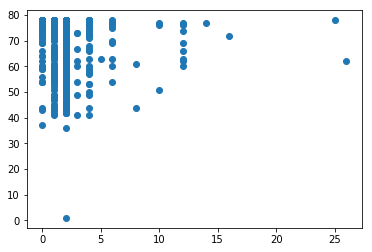

In [60]:
import matplotlib.pyplot as plt
x_dems = df_floor["Dem Sponsors"]
plt.scatter(x_dems, y)

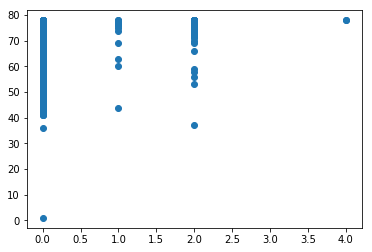

In [52]:
x_reps = df_floor["Rep Sponsors"]
plt.scatter(x_reps,y)

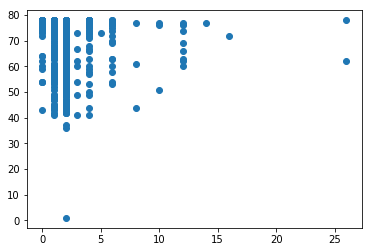

In [53]:
x_total = df_floor["Total Sponsors"]
plt.scatter(x_total, y)

In [24]:
df.to_csv("CA-bill-data")

In [25]:
#Now to use machine learning to predict votes
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [27]:
le = preprocessing.LabelEncoder()

In [28]:
X = df[["Venue", "Dem Sponsors", "Rep Sponsors"]]
y = df["Ayes"]

In [49]:
print(X)
print(y.shape)

          Venue  Dem Sponsors  Rep Sponsors
1         Floor             0             0
2         Floor             0             0
3     Committee             0             0
4         Floor             0             0
5         Floor             0             0
6         Floor             0             0
7         Floor             0             0
8         Floor             0             0
9         Floor             0             0
10        Floor             0             0
11    Committee             0             0
12        Floor             0             0
15        Floor             0             0
16        Floor             0             0
17    Committee             0             0
18    Committee             0             0
20    Committee             0             0
21    Committee             0             0
23        Floor             0             0
24    Committee             0             0
25        Floor             0             0
28        Floor             0   

In [42]:
X_shaped = X.values.reshape(-1, 1)
y_shaped = y.values.reshape(-1, 1)

In [33]:
fit_X = X.apply(le.fit_transform)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(fit_X, y)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and unknown targets

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_shaped, y_shaped, random_state=1, stratify=y)

ValueError: Found input variables with inconsistent numbers of samples: [4104, 1368]

In [44]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[11. 78. 54. ... 75. 75. 78.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [38]:
classifier.fit(X_train, y_train)

ValueError: Unknown label type: 'unknown'

In [96]:
enc = OneHotEncoder(categories = 'auto', handle_unknown='ignore')

TypeError: __init__() got an unexpected keyword argument 'categories'

In [95]:
fit_venue = enc.fit(df["Venue"])

ValueError: could not convert string to float: 'Floor'

In [57]:
encoded_asm_members = le.transform(asm_member_list_a)

In [44]:
asm_member_list = list(ca_asm_data_df["Last Name"])
asm_member_list_a = []
for i in range(0, len(asm_member_list)):
    asm_member_list_a.append(asm_member_list[i] + " (A)")

In [58]:
X = df[["Dem Sponsors", "Rep Sponsors"]]
y = df["Wicks"]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7406716417910447
Testing Data Score: 0.7430167597765364


In [64]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
124,0,4
446,0,0
143,0,4
618,0,0
109,0,0
89,0,0
546,0,0
30,0,0
245,0,0
553,4,4


In [90]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
X = 
y = foam["time"].values.reshape(-1, 1)